<class 'numpy.float64'>
14.657495116563826
Gradient at initial w, b (zeros): 23.3076584176 0.38276464
Gradient at test w, b: -604.20716616 -21.291064
Iteration    0: Cost   340.28   
Iteration    1: Cost   292.61   
Iteration    2: Cost   251.92   
Iteration    3: Cost   217.19   
Iteration    4: Cost   187.54   
Iteration    5: Cost   162.24   
Iteration    6: Cost   140.64   
Iteration    7: Cost   122.20   
Iteration    8: Cost   106.46   
Iteration    9: Cost    93.03   
Iteration   10: Cost    81.56   
Iteration   11: Cost    71.77   
Iteration   12: Cost    63.42   
Iteration   13: Cost    56.28   
Iteration   14: Cost    50.20   
Iteration   15: Cost    45.00   
Iteration   16: Cost    40.57   
Iteration   17: Cost    36.78   
Iteration   18: Cost    33.55   
Iteration   19: Cost    30.79   
Iteration   20: Cost    28.43   
Iteration   21: Cost    26.42   
Iteration   22: Cost    24.71   
Iteration   23: Cost    23.24   
Iteration   24: Cost    21.99   
Iteration   25: Cost    2

<ipython-input-2-72055f119f59>:135: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted[i] = w * X_train[i] + b


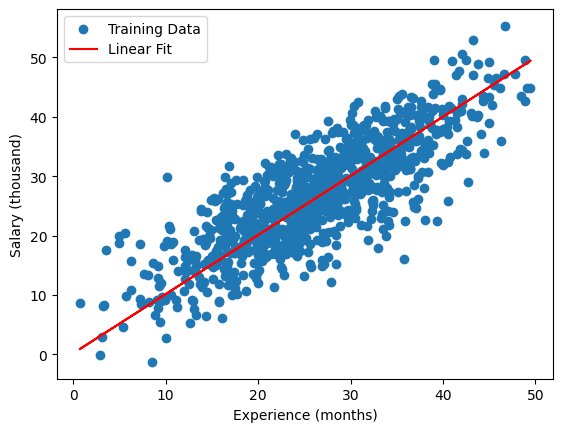

Predicted output for input values [17. 50.]: [17.09719903 49.97214123]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import copy

# Load the data
data = pd.read_csv('Experience-Salary.csv')

# Clean the data
data['experience'] = data['experience'].round(2)
data['salary'] = data['salary'].round(2)

# Split the data into features (X) and target variable (y)
X = data['experience'].values
y = data['salary'].values

# Reshape the values using the concept of a feature matrix
X_train = X.reshape(-1, 1)
y_train = y.reshape(-1, 1)

#Implementation 1 
def compute_cost(x, y, w, b):
    # """
    # Computes the cost function for linear regression.

    # Args:
    # x (ndarray): Shape (m,) Input to the model (experience in months)
    # y (ndarray): Shape (m,) Label (Actual salaries)
    # w, b (scalar): Parameters of the model

    # Returns
    # total_cost (float): The cost of using w, b as the parameters for linear regression
    # to fit the data points in x and y
    # """
    # number of training examples
    m = x.shape[0]

    # Compute the hypothesis
    h = w * x + b

    # Compute the cost
    total_cost = (1/(2*m)) * np.sum((h - y)**2)

    return total_cost

# Compute cost with some initial values for parameters w, b
initial_w = 0.9998
initial_b = 1

cost = compute_cost(X_train, y_train, initial_w, initial_b)
print(type(cost))
print(cost)
# Output for cost should be around 14.406

#Implementation 2
def compute_gradient(x, y, w, b):
    # """
    # Computes the gradient for linear regression
    # Args:
    # x (ndarray): Shape (m,) Input to the model (experience in months)
    # y (ndarray): Shape (m,) Label (Actual salaries)
    # w, b (scalar): Parameters of the model
    # Returns:
    # dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
    # dj_db (scalar): The gradient of the cost w.r.t. the parameter b
    # """

    # Number of training examples
    m = x.shape[0]

    # Compute the hypothesis
    h = w * x + b

    # Compute the gradients
    dj_dw = (1/m) * np.sum((h - y) * x)
    dj_db = (1/m) * np.sum(h - y)

    return dj_dw, dj_db

initial_w = 0.998
initial_b = 1

tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)
# Output should be Gradient at initial w, b (zeros): [22.08482317] [0.36802405]

test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, test_w, test_b)
print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)
# Output should be Gradient at test w, b: [-600.2060557] [-21.2052925]

#Gradient descent and model training
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(x)
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i < 100000:
            cost = cost_function(x, y, w, b)
            J_history.append(cost)
        if i % math.ceil(num_iters/10) == 0:
            w_history.append(w)
        print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w, b, J_history, w_history

# Now let's run the gradient descent algorithm above to learn the parameters for our dataset.
# You can alter the values of iterations, alpha to get the minimum cost and minimum values for w and b

# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 2500
alpha = 0.0001

w, b, _, _ = gradient_descent(X_train, y_train, initial_w, initial_b,
    compute_cost, compute_gradient, alpha, iterations)
print("w, b found by gradient descent:", w, b)

# execute the code to predict the output values on the given input of numpy arrays
# do not alter the code, just execute it
m = X_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * X_train[i] + b

# Plot the linear fit
plt.scatter(X_train, y_train, label='Training Data')
plt.plot(X_train, predicted, color='red', label='Linear Fit')
plt.xlabel('Experience (months)')
plt.ylabel('Salary (thousand)')
plt.legend()
plt.show()

# Predict output on input values [17.0, 50.0]
input_values = np.array([17.0, 50.0])
predicted_output = w * input_values + b
print(f"Predicted output for input values {input_values}: {predicted_output}")

